# Project I | Deep Learning: Image Classification with CNN
-----

# Part 1 - Data Preprocessing
- To build a Convolutional Neural Network (CNN) model to classify images from the Animals10 dataset.

1. Data Loading
- Load the dataset (e.g., from folders or URLs)
- Split into train/validation/test sets

2. Preprocessing
- Resize images, normalize pixel values, and apply augmentations (flip, rotate, etc.)

3. Visualization
- Show sample images with labels using matplotlib


# 1. Imports and GPU Setup

In [9]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


# 2. Data Loading and Preprocessing

In [ ]:
# Path to dataset
dataset_path = '../../data/animals10/'

# Define transformations: Resize, Augment, Convert to Tensor, Normalize
transform = transforms.Compose([
    transforms.Resize((128, 128)),          # Resize to 128x128
    transforms.RandomHorizontalFlip(),      # Data augmentation
    transforms.ToTensor(),                  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))    # Normalize to [-1, 1]
])

# Load dataset
dataset = ImageFolder(root=dataset_path, transform=transform)

# Split dataset (80% training, 20% validation)
val_size = int(0.2 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Wrap in DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Total images: {len(dataset)}")
print(f"Training set: {len(train_dataset)}")
print(f"Validation set: {len(val_dataset)}")


Total images: 26179
Training set: 20944
Validation set: 5235


# 3. Visualize Sample Images

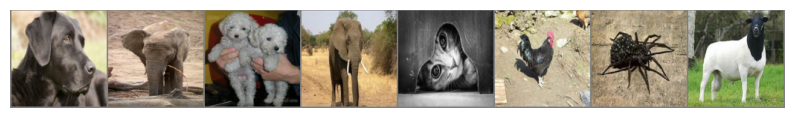

Labels: ['cane', 'elefante', 'cane', 'elefante', 'gatto', 'gallina', 'ragno', 'pecora']


In [ ]:
# Show image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize from [-1,1] to [0,1]
    npimg = img.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images with labels
imshow(torchvision.utils.make_grid(images[:8]))
print('Labels:', [dataset.classes[label] for label in labels[:8]])


# 📘 Part 2 - Model Architecture

Goal:
- A CNN built from scratch using PyTorch

Include:
- Convolutional Layers
- Pooling Layers
- Fully Connected (Linear) Layers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a Convolutional Neural Network class for animal image classification
class AnimalCNN(nn.Module):
    def __init__(self, num_classes):

        super(AnimalCNN, self).__init__()

        # ---- Convolutional Block 1 ----
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),  # Activation function
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # ---- Convolutional Block 2 ----
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # ---- Convolutional Block 3 ----
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Flatten the 3D tensor into 1D for the fully connected layers
        self.flatten = nn.Flatten()

        # ---- Fully Connected Layers ----
        self.fc1 = nn.Linear(128 * 16 * 16, 256)

        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # How data flows through the network
        x = self.conv_block1(x)  # First conv block
        x = self.conv_block2(x)  # Second
        x = self.conv_block3(x)  # Third
        x = self.flatten(x)      # Flatten
        x = F.relu(self.fc1(x))  # Apply ReLU
        x = self.fc2(x)          
        return x


# Model Initialization & Summary

In [13]:
num_classes = len(dataset.classes)
model = AnimalCNN(num_classes=num_classes) 
model.to(device)
print(model)


AnimalCNN(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


# 🧠 Part 3 - Model Training

- Train the CNN using SGD and Adam, will pick the best one.
- Use a loss function
- Track accuracy and loss
- Add early stopping to prevent overfitting


Epoch 1/20


100%|██████████| 655/655 [00:34<00:00, 19.01it/s]


Train Loss: 1.5864, Accuracy: 0.4469
Val Loss: 1.2876, Accuracy: 0.5628
Model improved. Saving model.

Epoch 2/20


100%|██████████| 655/655 [00:35<00:00, 18.64it/s]


Train Loss: 1.1157, Accuracy: 0.6173
Val Loss: 1.0721, Accuracy: 0.6363
Model improved. Saving model.

Epoch 3/20


100%|██████████| 655/655 [00:35<00:00, 18.45it/s]


Train Loss: 0.9041, Accuracy: 0.6899
Val Loss: 1.0458, Accuracy: 0.6487
Model improved. Saving model.

Epoch 4/20


100%|██████████| 655/655 [00:34<00:00, 18.89it/s]


Train Loss: 0.7540, Accuracy: 0.7455
Val Loss: 1.0000, Accuracy: 0.6602
Model improved. Saving model.

Epoch 5/20


100%|██████████| 655/655 [00:34<00:00, 18.92it/s]


Train Loss: 0.6112, Accuracy: 0.7968
Val Loss: 0.9207, Accuracy: 0.7051
Model improved. Saving model.

Epoch 6/20


100%|██████████| 655/655 [00:34<00:00, 18.94it/s]


Train Loss: 0.4817, Accuracy: 0.8427
Val Loss: 1.0294, Accuracy: 0.6816
No improvement. Early stop counter: 1/2

Epoch 7/20


100%|██████████| 655/655 [00:35<00:00, 18.71it/s]


Train Loss: 0.3764, Accuracy: 0.8785
Val Loss: 1.0692, Accuracy: 0.7028
No improvement. Early stop counter: 2/2
Early stopping triggered.


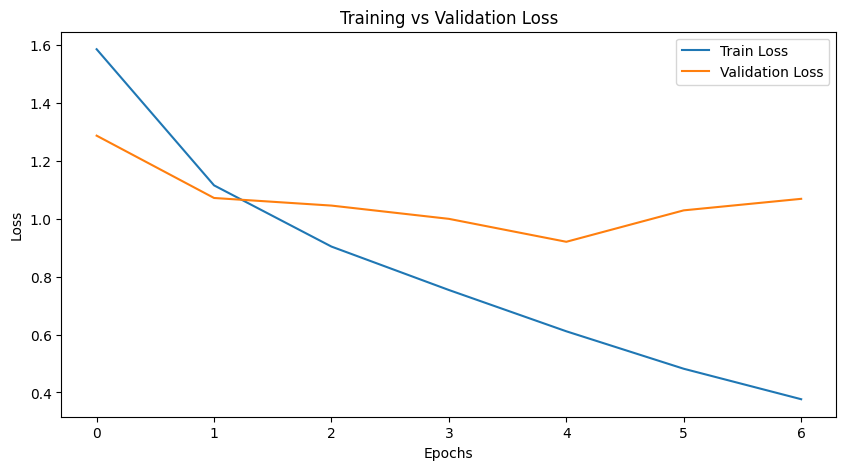

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training settings
num_epochs = 20
patience = 2  # Early stopping patience
best_val_loss = float('inf')
epochs_no_improve = 0

best_model = "../../models/best_cnn_model_luis.pth"

train_losses, val_losses = [], []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    
    # ---- Training ----
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Reset gradients to zero before backprop
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)# Compute loss
        loss.backward()                  # Backpropagation
        optimizer.step()                 # Update weights

        running_loss += loss.item()      # Accumulate loss
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        total += labels.size(0)          # Total number of samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

    # Compute metrics for this epoch
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)

    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

    # ---- Validation ----
    model.eval()# Set model to evaluation mode
    val_running_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():  # Disable gradient tracking (saves memory & speed)
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    #Compute validation metrics
    val_loss = val_running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)

    print(f"Val Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

    # ------------------ EARLY STOPPING ------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), best_model)
        print("Model improved. Saving model.")
        epochs_no_improve = 0
    else:
        # No improvement → increase patience counter
        epochs_no_improve += 1
        print(f"No improvement. Early stop counter: {epochs_no_improve}/{patience}")

    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break


# ---- Plot Loss Curves ----
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


- Training Loss: How well the model is doing on the training data (the data it sees during learning).
- Validation Loss: How well the model is doing on unseen data.
- Ideal Scenario: Low training and validation loss that stay close to each other.

If:
- Training loss ↓ but validation loss ↑ → model is overfitting
- Both losses ↓ together → we are doing well

# Model Evaluation

- Evaluate the trained model on a separate validation set.
- Compute and report metrics such as accuracy, precision, recall, and F1-score.
- Visualize the confusion matrix to understand model performance across different classes.

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Ensure Ensure
all_preds = []
all_labels = []

with torch.no_grad(): # Set model to evaluation mode
    for inputs, labels in val_loader: # Iterate over validation data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy()) # Store predictions
        all_labels.extend(labels.cpu().numpy()) # Store true labels

# Compute Metrics
acc = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
rec = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")


✅ Accuracy: 0.6989
✅ Precision: 0.7027
✅ Recall: 0.6989
✅ F1 Score: 0.6974


# Confusion Matrix 

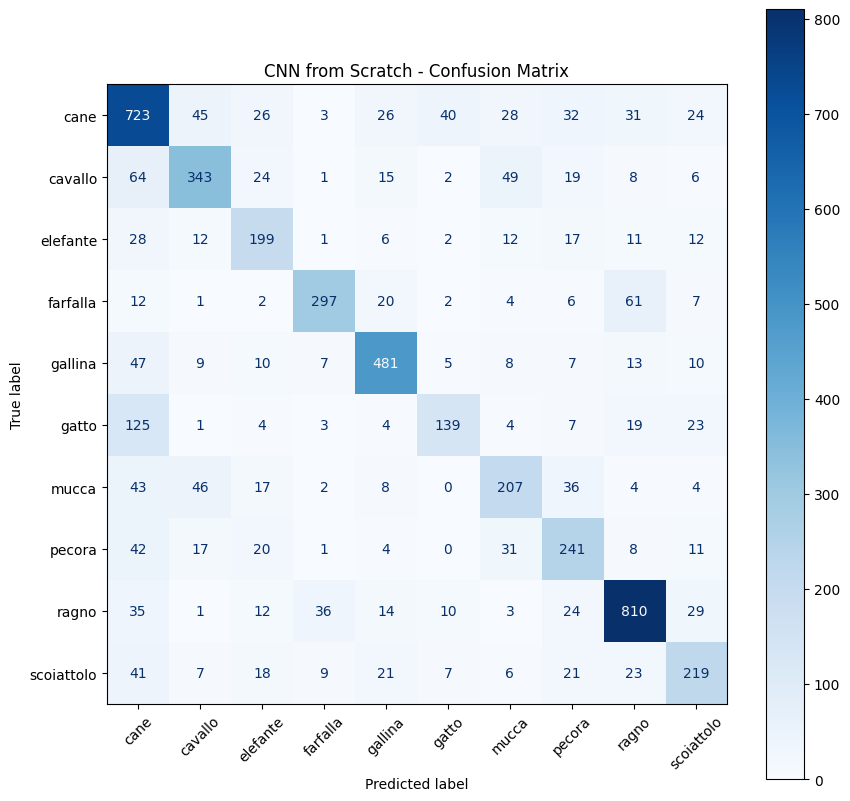

In [ ]:
# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds) # Compute confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes) # Create display object

fig, ax = plt.subplots(figsize=(10, 10)) # Create figure and axis
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=45) # Plot confusion matrix
plt.title("CNN from Scratch - Confusion Matrix")
plt.grid(False)
plt.show()

